<a href="https://colab.research.google.com/github/madhavjk/DataScience-ML_and_DL/blob/main/SESSION_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentence_list = [
                 "I love machine learning",
                 "I love deep learning",
                 "We are learning deep learning",
                 ]

In [ ]:
# Tokenization
tokenizer = Tokenizer(num_words=50)
tokenizer.fit_on_texts(sentence_list)
word_index = tokenizer.word_index
print(word_index)

{'learning': 1, 'i': 2, 'love': 3, 'deep': 4, 'machine': 5, 'we': 6, 'are': 7}


In [ ]:
# Sequencing
sentence_list = [
                 "I love machine learning",
                 "I love deep learning",
                 "We are learning deep learning",
                 "We are learning from the best trainer"
                 ]

tokenizer = Tokenizer(num_words=50)
tokenizer.fit_on_texts(sentence_list)
word_index = tokenizer.word_index
print(word_index)

sequences = tokenizer.texts_to_sequences(sentence_list)
for s in sequences: print(s)

{'learning': 1, 'i': 2, 'love': 3, 'deep': 4, 'we': 5, 'are': 6, 'machine': 7, 'from': 8, 'the': 9, 'best': 10, 'trainer': 11}
[2, 3, 7, 1]
[2, 3, 4, 1]
[5, 6, 1, 4, 1]
[5, 6, 1, 8, 9, 10, 11]


In [ ]:
# Testing on new words
new = ["The world is screwed up, so are we"]
sequence = tokenizer.texts_to_sequences(new)
print(sequence) 

[[9, 6, 5]]


In [ ]:
# Out of vocabulary Token
sentence_list = [
                 "I love machine learning",
                 "I love deep learning",
                 "We are learning deep learning",
                 "We are learning from the best trainer"
                 ]

tokenizer = Tokenizer(num_words=50,oov_token="#OOV")
tokenizer.fit_on_texts(sentence_list)
word_index = tokenizer.word_index
print(word_index)

sequences = tokenizer.texts_to_sequences(sentence_list)
for s in sequences: print(s)

{'#OOV': 1, 'learning': 2, 'i': 3, 'love': 4, 'deep': 5, 'we': 6, 'are': 7, 'machine': 8, 'from': 9, 'the': 10, 'best': 11, 'trainer': 12}
[3, 4, 8, 2]
[3, 4, 5, 2]
[6, 7, 2, 5, 2]
[6, 7, 2, 9, 10, 11, 12]


In [ ]:
new = ["The world is screwed up, so are we"]
sequence = tokenizer.texts_to_sequences(new)
print(sequence)

[[10, 1, 1, 1, 1, 1, 7, 6]]


In [ ]:
sentence_list = [
                 "I love machine learning",
                 "I love deep learning",
                 "We are learning deep learning",
                 "We are learning from the best trainer",
                 "The world is screwed up, so are we"
                 ]

tokenizer = Tokenizer(num_words=50,oov_token="#OOV")
tokenizer.fit_on_texts(sentence_list)
word_index = tokenizer.word_index
print(word_index)

sequences = tokenizer.texts_to_sequences(sentence_list)
for s in sequences: print(s)

{'#OOV': 1, 'learning': 2, 'we': 3, 'are': 4, 'i': 5, 'love': 6, 'deep': 7, 'the': 8, 'machine': 9, 'from': 10, 'best': 11, 'trainer': 12, 'world': 13, 'is': 14, 'screwed': 15, 'up': 16, 'so': 17}
[5, 6, 9, 2]
[5, 6, 7, 2]
[3, 4, 2, 7, 2]
[3, 4, 2, 10, 8, 11, 12]
[8, 13, 14, 15, 16, 17, 4, 3]


In [ ]:
# Padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_seq = pad_sequences(sequences, padding='post')
for s in padded_seq: print(s)

[5 6 9 2 0 0 0 0]
[5 6 7 2 0 0 0 0]
[3 4 2 7 2 0 0 0]
[ 3  4  2 10  8 11 12  0]
[ 8 13 14 15 16 17  4  3]


# Training a recurrent Neural Network

In [ ]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLSB8WU/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLSB8WU/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteLSB8WU/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [ ]:
count = 1;
for s,l in train_data: 
    if count >5:break
    print(s,l,end = "\n\n")
    count+=1

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string) tf.Tensor(0, shape=(), dtype=int64)

tf.Tensor(b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on 

In [ ]:
count = 1;
for s in training_sentences: 
    if count >5:break
    print(s,end="\n\n")
    count+=1

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.

I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was con

In [ ]:
count = 1;
for l in training_labels: 
    if count >5:break
    print(l,end="\n\n")
    count+=1
    
print(len(training_sentences))
print(len(training_labels))

0

0

0

1

1

25000
25000


In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "#OOV"

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size , embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_8 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 173,601
Trainable params: 173,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = (model.fit(padded, training_labels_final, epochs=5, validation_data=(testing_padded, testing_labels_final)))

Epoch 1/5
782/782 [==============================] - 17s 18ms/step - loss: 0.5767 - accuracy: 0.6639 - val_loss: 0.3714 - val_accuracy: 0.8408
Epoch 2/5
782/782 [==============================] - 13s 17ms/step - loss: 0.2905 - accuracy: 0.8850 - val_loss: 0.3804 - val_accuracy: 0.8387
Epoch 3/5
782/782 [==============================] - 14s 17ms/step - loss: 0.2195 - accuracy: 0.9202 - val_loss: 0.4427 - val_accuracy: 0.8296
Epoch 4/5
782/782 [==============================] - 13s 17ms/step - loss: 0.1704 - accuracy: 0.9378 - val_loss: 0.4155 - val_accuracy: 0.8326
Epoch 5/5
782/782 [==============================] - 14s 17ms/step - loss: 0.1463 - accuracy: 0.9474 - val_loss: 0.4954 - val_accuracy: 0.8213


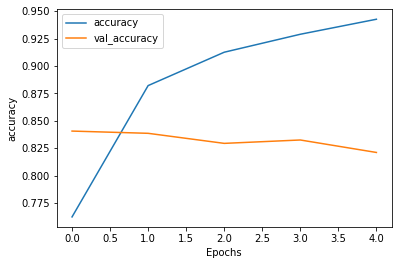

In [ ]:
import matplotlib.pyplot as plt



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

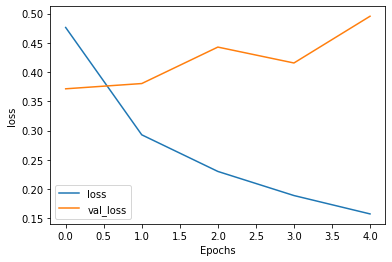

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

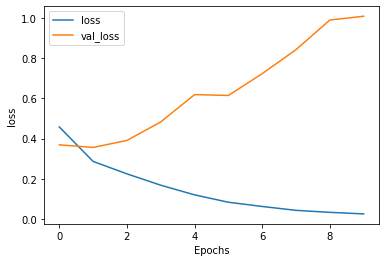